**Outliers Analysis**

In [ ]:
# Useful libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


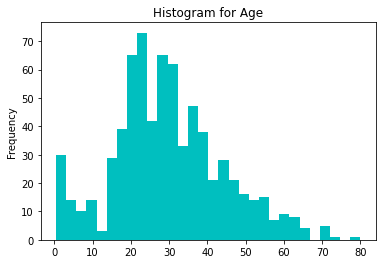

In [ ]:
#Use histogram to understand the distributions
titanic.Age.plot(kind='hist', title='Histogram for Age',bins=30, color='c')

In [ ]:
#We can see that most of the age values are in the [20, 30s] and a very few are in [70, 80s]. Let's have have a look a those passengers where their age is more than 70.
titanic.loc[titanic.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


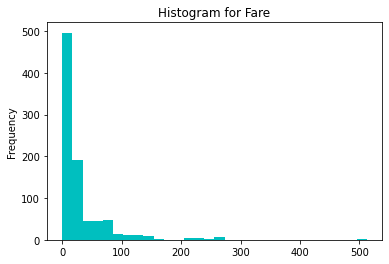

In [ ]:
#We have 5 passengers in the results, with 1 survivors (survived=1) and 4 who did not survive (survived=0)
titanic.Fare.plot(kind='hist', title='Histogram for Fare',bins=30, color='c')
#We can see that there are few passengers who have paid exceptional high fare (more than 400) than the rest of the others!

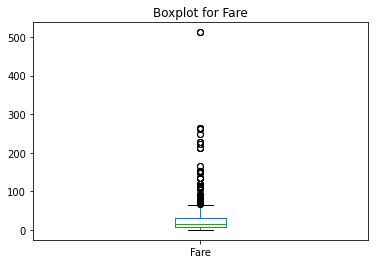

In [ ]:
#create a Boxplot for passenger fare
titanic.Fare.plot(kind='box', title='Boxplot for Fare')
#We can identify many outliers, but there is one (more than 500) which is significantly far from the others.

In [ ]:
titanic.loc[titanic.Fare == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
#There are 3passengers who have paid a very high fare of 512, moreover, they have the same ticket number, and were also in the First class. This might a family that booked in last moment. Then, all of them survived to the tragedy.

In [ ]:
#Transformation of outliers
#By looking at the fare histogram, we can see that we have a very right skewed distribution, so we can reduce the skeweness by applying some kind of transformation. As we know that the passenger fare will never be negative, then, we can apply the Log transformation technique.
#Log transformation
Log_fare = np.log(titanic.Fare + 1.0)    

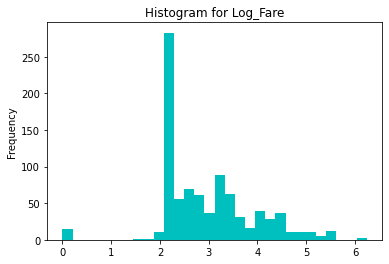

In [ ]:
# Let's look at the histogram of the Log transformation
Log_fare.plot(kind='hist', title='Histogram for Log_Fare', 
                  bins=30, color='c')#We can see that our resultant histogram is less skewed than the original one

In [ ]:
#Binning
#This is also a very useful technique for outliers treatment. We can the binning by using the pandas qcut function, that performs quantile-based binning. Here we are splitting the passenger fare in 4 bins, where each bin contains almost equal number of observations.

In [ ]:
pd.qcut(titanic.Fare, 3)

0      (-0.001, 8.662]
1      (26.0, 512.329]
2      (-0.001, 8.662]
3      (26.0, 512.329]
4      (-0.001, 8.662]
            ...       
886      (8.662, 26.0]
887    (26.0, 512.329]
888      (8.662, 26.0]
889    (26.0, 512.329]
890    (-0.001, 8.662]
Name: Fare, Length: 891, dtype: category
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [ ]:
#We can see that pandas has created 4 bins, and each observation has been added into one bin. This technique also allows us to specify a name for each bin.
# we are going to create the following ones which are self explanatory: very_low_fare, low_fare, high_fare, vey_high_fare. Such technique is known as discretization.

In [ ]:
pd.qcut(titanic.Fare, 3, labels = ['low_fare','medium_fare','high_fare'])
#we can see that pandas has assigned each observation, one label. So, we have created a categorical feature, where each fare value corresponds to a categorical level (ordinal).
#Now, we can visualize the number of fare value for each category.

0         low_fare
1        high_fare
2         low_fare
3        high_fare
4         low_fare
          ...     
886    medium_fare
887      high_fare
888    medium_fare
889      high_fare
890       low_fare
Name: Fare, Length: 891, dtype: category
Categories (3, object): ['low_fare' < 'medium_fare' < 'high_fare']

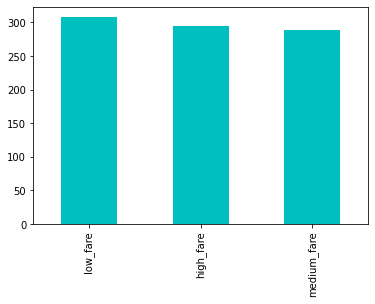

In [ ]:
fare_labels = ['low_fare','medium_fare','high_fare'] 

pd.qcut(titanic.Fare, 3, labels=fare_labels). \
        value_counts().plot(kind='bar', color='c')

In [ ]:
#We can see that we have almost the same number of observations in each bin.
#Now that we have analysed and preprocessed the fare feature, we can now create a new feature corresponding to that preprocessed value, and remove the old one.

In [ ]:
titanic['fare_bin'] = pd.qcut(titanic.Fare, 3, fare_labels)

In [ ]:
titanic.drop('Fare', axis=1, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,low_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,high_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,low_fare


Part-2/Chauvenet’s Criterion

In [ ]:
import numpy as np
import pandas as pd
import os
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.special import erfc
import scipy
warnings.simplefilter('ignore')
plt.style.use('seaborn')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c santander-customer-transaction-prediction

 95% 119M/125M [00:01<00:00, 99.6MB/s] 
100% 125M/125M [00:01<00:00, 111MB/s] 
  0% 0.00/462k [00:00<?, ?B/s]
100% 462k/462k [00:00<00:00, 148MB/s]
100% 125M/125M [00:01<00:00, 90.9MB/s]



In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

3 archives were successfully processed.


In [ ]:
train=pd.read_csv('train.csv')
train.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.284,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.800,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [ ]:
test=pd.read_csv('test.csv')
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [ ]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

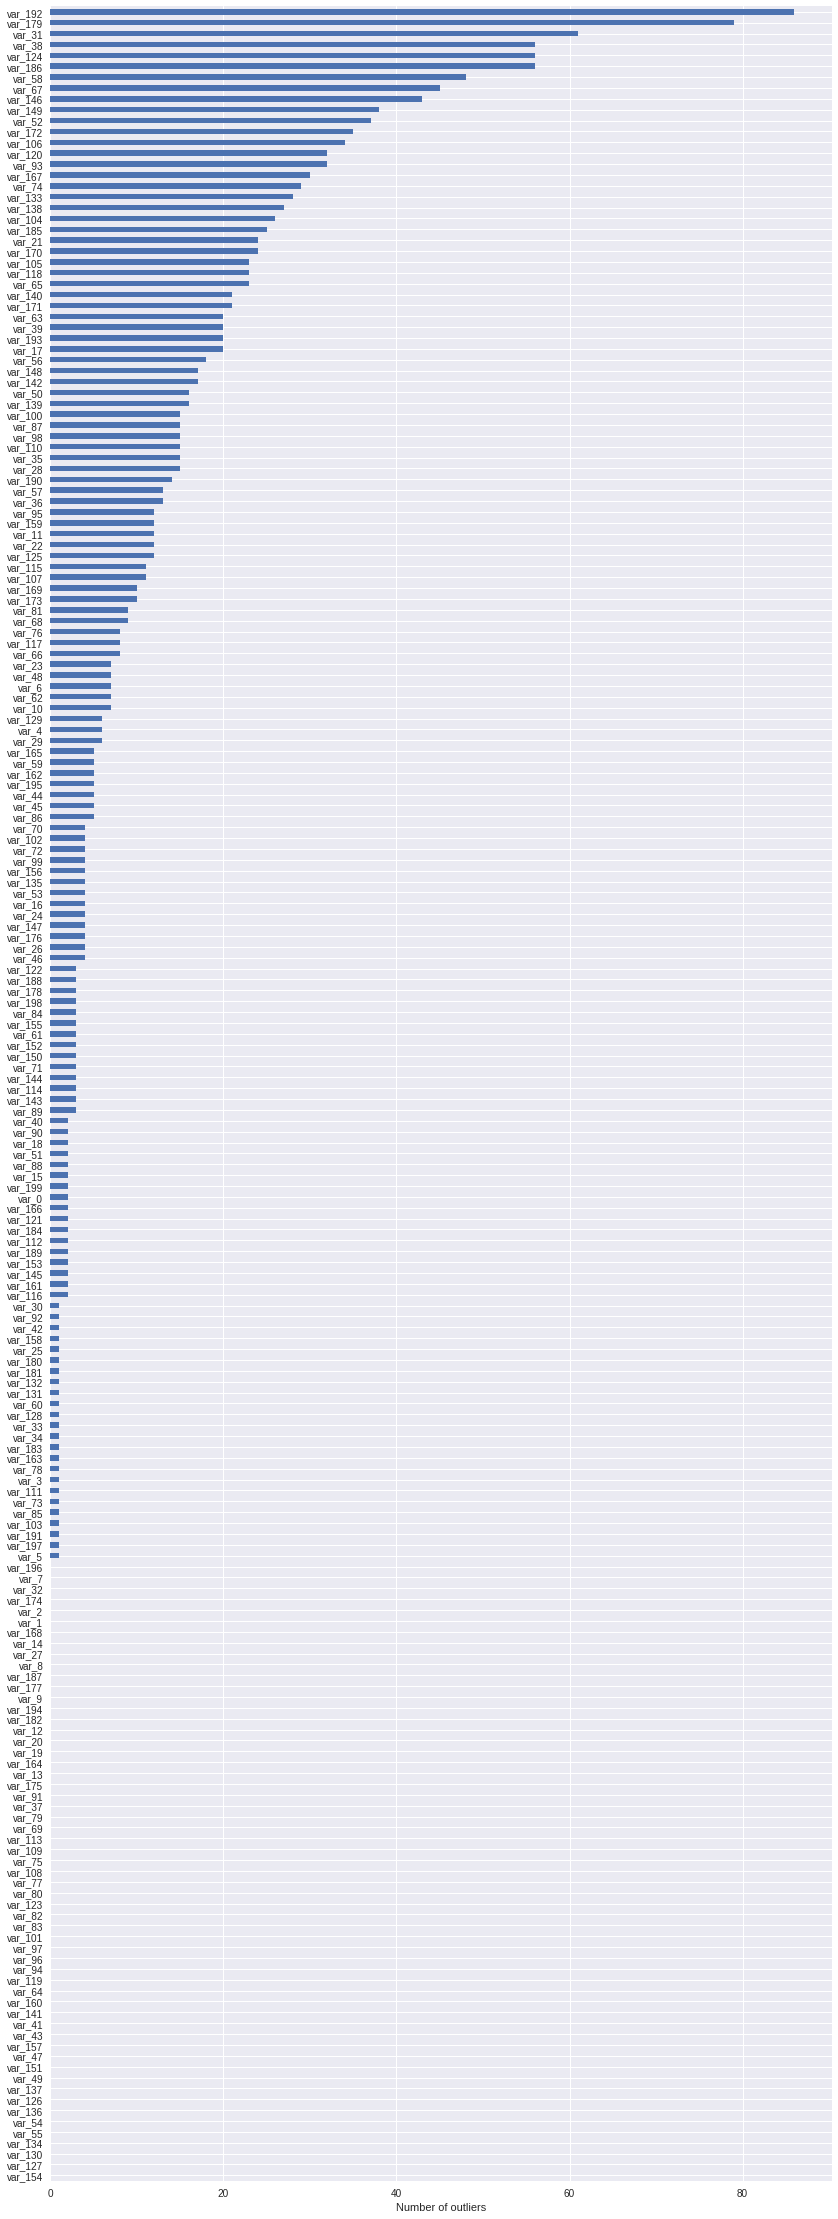

In [ ]:
train_outliers = dict()
for col in [col for col in train.columns if 'var_' in col]:
    train_outliers[col] = train[chauvenet(train[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

**JantaHack Study for outliers**

**Spotify Song Popularity Prediction**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

100% 16.5M/16.5M [00:00<00:00, 50.8MB/s]



In [ ]:
!unzip \*.zip

Archive:  spotify-dataset-19212020-160k-tracks.zip
  inflating: data.csv                
  inflating: data_by_artist.csv      
  inflating: data_by_genres.csv      
  inflating: data_by_year.csv        
  inflating: data_w_genres.csv       


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data = data.drop(['artists', 'id', 'name', 'release_date'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  popularity        170653 non-null  int64  
 13  speechiness       170653 non-null  float64
 14  tempo             170653 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 19.5 MB


In [ ]:
import warnings
warnings.simplefilter('ignore')

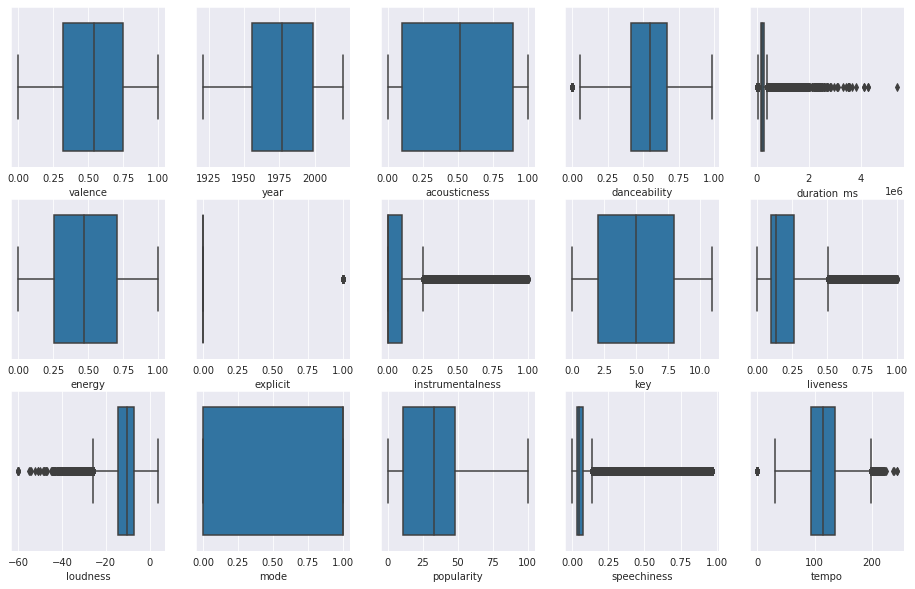

In [ ]:
#Outlier Detection
plt.figure(figsize=(16, 10))

for i in range(len(data.columns)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data[data.columns[i]])

plt.show()

In [ ]:
def get_outlier_counts(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [ ]:
get_outlier_counts(data, 0.99999999999)

valence               0
year                  0
acousticness          0
danceability          0
duration_ms         404
energy                0
explicit              0
instrumentalness      0
key                   0
liveness              0
loudness             16
mode                  0
popularity            0
speechiness           0
tempo                 0
dtype: int64

In [ ]:
def remove_outliers(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_score
    
    # Get indices of the outliers
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]
    
    # Drop outlier examples
    df = df.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return df

In [ ]:
#Preprocessing
def preprocess_inputs(df, outliers=True, threshold=0.95):
    df = df.copy()
    
    # Remove outliers if specified
    if outliers == False:
        df = remove_outliers(df, threshold)
    
    # Split df into X and y
    y = df['popularity'].copy()
    X = df.drop('popularity', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [ ]:
outlier_X_train, outlier_X_test, outlier_y_train, outlier_y_test = preprocess_inputs(data, outliers=True)

X_train, X_test, y_train, y_test = preprocess_inputs(data, outliers=False, threshold=0.99999999999)

In [ ]:
#Training
# With outliers

outlier_model = LinearRegression()
outlier_model.fit(outlier_X_train, outlier_y_train)

outlier_model_acc = outlier_model.score(outlier_X_test, outlier_y_test)

print("Test Accuracy (Outliers): {:.5f}%".format(outlier_model_acc * 100))

Test Accuracy (Outliers): 75.09886%


In [ ]:
## Without outliers

model = LinearRegression()
model.fit(X_train, y_train)

model_acc = model.score(X_test, y_test)

print("Test Accuracy (No Outliers): {:.5f}%".format(model_acc * 100))

Test Accuracy (No Outliers): 75.35322%


**JantaHack Study for outliers**

In [33]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (3).json


In [34]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 69 bytes


In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [36]:
!kaggle datasets download -d vishalakarnia/jantahack

jantahack.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip \*.zip

Archive:  spotify-dataset-19212020-160k-tracks.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace data_by_artist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_artist.csv      
replace data_by_genres.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_genres.csv      
replace data_by_year.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_by_year.csv        
replace data_w_genres.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_w_genres.csv       

Archive:  jantahack.zip
  inflating: train_Wc8LBpr.csv       

2 archives were successfully processed.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
janta_train=pd.read_csv("train_Wc8LBpr.csv")
janta_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [40]:
janta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [41]:
janta_train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [42]:
janta_train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

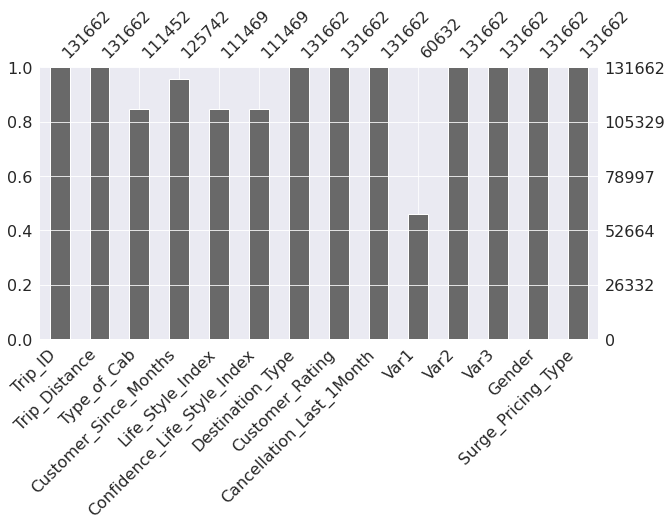

In [43]:
import missingno as msno
msno.bar(janta_train, figsize=(10,5))
plt.show()

In [44]:
janta_train["Type_of_Cab"].unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [45]:
janta_train["Type_of_Cab"].replace(np.nan,'?',inplace=True)

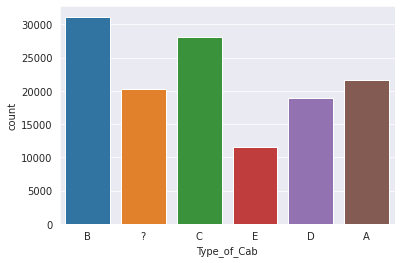

In [46]:
sns.countplot(data=janta_train,x='Type_of_Cab')

In [47]:
janta_train.loc[janta_train['Type_of_Cab']=='?'].head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
2,T0005689464,41.58,?,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
11,T0005689477,90.93,?,0.0,2.95327,C,C,2.93500,1,NaN,46,63,Male,2
15,T0005689485,14.18,?,1.0,2.16167,A,A,3.19750,1,NaN,46,57,Female,2
28,T0005689505,31.82,?,10.0,2.70044,C,B,3.15125,1,NaN,51,66,Male,1
32,T0005689509,18.34,?,4.0,2.59621,A,B,3.15875,0,NaN,53,72,Male,1


In [48]:
janta_train['Type_of_Cab'].value_counts()/len(janta_train)*100

B    23.648433
C    21.359238
A    16.382100
?    15.349911
D    14.424056
E     8.836263
Name: Type_of_Cab, dtype: float64

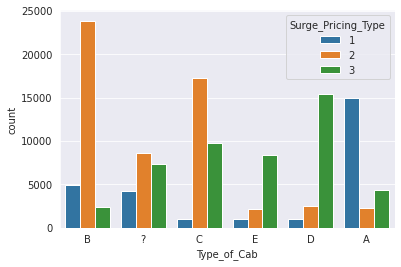

In [49]:
sns.countplot(data=janta_train,x='Type_of_Cab',hue='Surge_Pricing_Type')

In [ ]:
#As now we can see that Surge_Pricing_Type 1 cause the type A cab
#And Surge_Pricing_Type 2 cause the type B ,and Surge_Pricing_Type 3 cause type D cab analysis based on most no of customers

In [50]:
#Now replacing the nan values in categorical variable by thier mode and continuous variable by their mea
janta_train['Type_of_Cab'].replace('?',janta_train['Type_of_Cab'].mode()[0],inplace=True)

In [51]:
janta_train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [52]:
janta_train['Customer_Since_Months'].replace(np.nan,janta_train['Customer_Since_Months'].mean(),inplace=True)
janta_train['Life_Style_Index'].replace(np.nan,janta_train['Life_Style_Index'].mean(),inplace=True)
janta_train['Confidence_Life_Style_Index'].replace(np.nan,janta_train['Confidence_Life_Style_Index'].mode()[0],inplace=True)
janta_train['Var1'].replace(np.nan,janta_train['Var1'].mean(),inplace=True)

In [53]:
janta_train.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

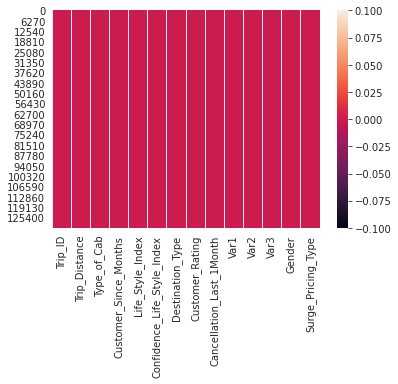

<Figure size 7200x7200 with 0 Axes>

In [54]:
sns.heatmap(janta_train.isnull())
plt.figure(figsize=(100,100))
plt.show()

In [55]:
janta_train['Surge_Pricing_Type'].unique()

array([2, 3, 1])

In [56]:
janta_train['Surge_Pricing_Type']=janta_train['Surge_Pricing_Type'].astype(object)

In [57]:
janta_train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type              object
dtype: object

In [58]:
janat_train=janta_train.drop('Trip_ID',inplace=True,axis=1)

In [59]:
janta_train.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type              object
dtype: object

In [60]:
janta_train['Trip_Distance'].head()

0     6.77
1    29.47
2    41.58
3    61.56
4    54.95
Name: Trip_Distance, dtype: float64

In [61]:
janta_train['Trip_Distance']=janta_train['Trip_Distance'].round()

In [62]:
janta_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,7.0,B,1.0,2.427690,A,A,3.90500,0,40.000000,46,60,Female,2
1,29.0,B,10.0,2.782450,B,A,3.45000,0,38.000000,56,78,Male,2
2,42.0,B,10.0,2.802064,B,E,3.50125,2,64.202698,56,77,Male,2
3,62.0,C,10.0,2.802064,B,A,3.45375,0,64.202698,52,74,Male,3
4,55.0,C,10.0,3.034530,B,A,3.40250,4,51.000000,49,102,Male,2


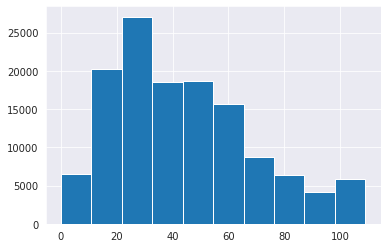

In [63]:
janta_train['Trip_Distance'].hist()

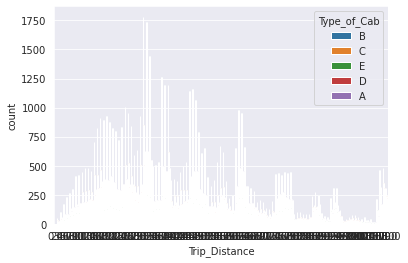

In [64]:
sns.countplot(data=janta_train,hue='Type_of_Cab',x='Trip_Distance')

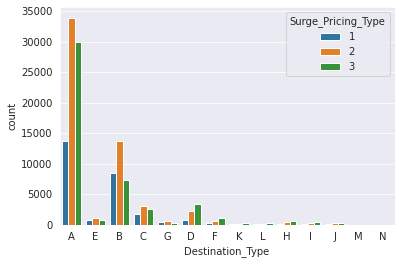

In [65]:
sns.countplot(data=janta_train,hue='Surge_Pricing_Type',x='Destination_Type')

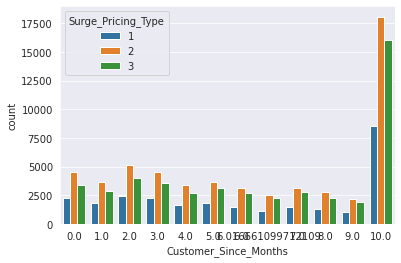

In [66]:
sns.countplot(data=janta_train,hue='Surge_Pricing_Type',x='Customer_Since_Months')

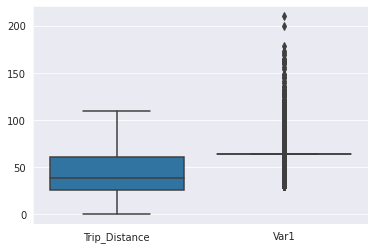

In [67]:
#Now lets treat the outliers
sns.boxplot(data=janta_train[['Trip_Distance','Var1']])

In [68]:
janta_train['Var1'].quantile([0.1,0.2,0.3,0.4])

0.1    44.000000
0.2    57.000000
0.3    64.202698
0.4    64.202698
Name: Var1, dtype: float64

In [69]:
janta_train['Var1'].quantile([0.97,0.98,0.99,1])

0.97    102.0
0.98    105.0
0.99    109.0
1.00    210.0
Name: Var1, dtype: float64

In [70]:
# janta_train.drop(janta_train[janta_train['Var1']<57.000000].index,axis=0,inplace=True)
janta_train.drop(janta_train[janta_train['Var1']>109.0].index,axis=0,inplace=True)

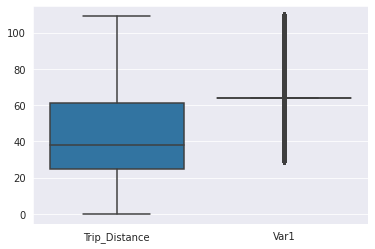

In [71]:
sns.boxplot(data=janta_train[['Trip_Distance','Var1']])

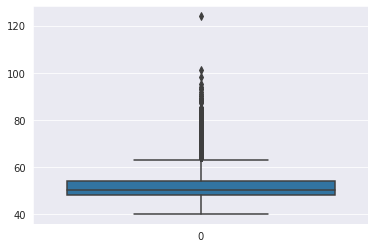

In [72]:
sns.boxplot(data=janta_train['Var2'])

In [73]:
janta_train['Var2'].quantile([0.1,0.2,0.3,0.4])

0.1    46.0
0.2    47.0
0.3    48.0
0.4    49.0
Name: Var2, dtype: float64

In [74]:
janta_train['Var2'].quantile([0.97,0.98,0.99,1])

0.97     62.0
0.98     64.0
0.99     67.0
1.00    124.0
Name: Var2, dtype: float64

In [75]:
janta_train.drop(janta_train[janta_train['Var2']>67.0].index,axis=0,inplace=True)

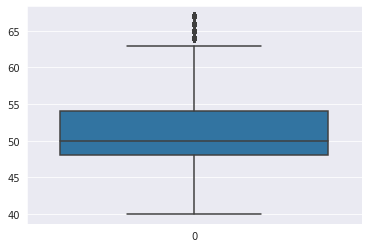

In [76]:
sns.boxplot(data=janta_train['Var2'])

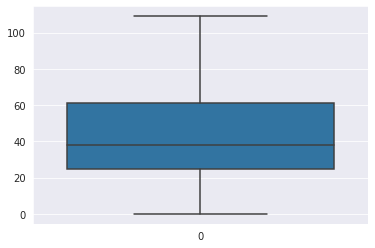

In [77]:
sns.boxplot(data=janta_train['Trip_Distance'])

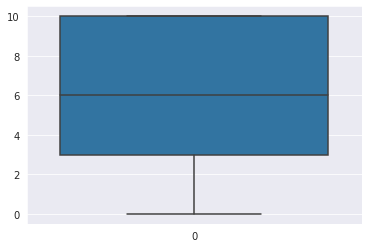

In [78]:
sns.boxplot(data=janta_train['Customer_Since_Months'])

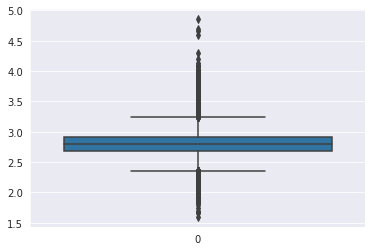

In [79]:
sns.boxplot(data=janta_train['Life_Style_Index'])

In [80]:
janta_train['Life_Style_Index'].quantile([0.1,0.2,0.3,0.4])

0.1    2.546400
0.2    2.646790
0.3    2.714455
0.4    2.781190
Name: Life_Style_Index, dtype: float64

In [81]:
janta_train['Life_Style_Index'].quantile([0.97,0.98,0.99,1])

0.97    3.206339
0.98    3.258140
0.99    3.353173
1.00    4.853780
Name: Life_Style_Index, dtype: float64

In [82]:
janta_train.drop(janta_train[janta_train['Life_Style_Index']>3.353173].index,axis=0,inplace=True)

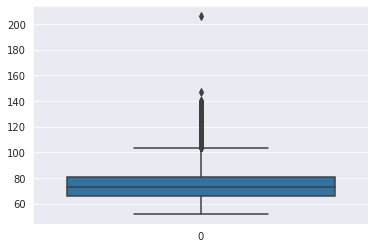

In [83]:
sns.boxplot(data=janta_train['Var3'])

In [84]:
janta_train['Var3'].quantile([0.97,0.98,0.99,1])

0.97     99.0
0.98    102.0
0.99    107.0
1.00    206.0
Name: Var3, dtype: float64

In [85]:
janta_train.drop(janta_train[janta_train['Var3']>107.0].index,axis=0,inplace=True)

In [86]:
janta_train.shape

(127102, 13)